In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc


Skaitmeniniu bootstrapping metodu nustatykite ir pavaizduokite prediction ir confidence intervalus tiesiniam saryšiui y = k * x + b ties x = 30, kai matavimų duomenys yra nuo x_min = 0 iki x_max = 20.

Resampling methods: https://www.youtube.com/watch?v=gcPIyeqymOU

Prediction ir confidence intervalai: https://www.youtube.com/watch?v=qVCQi0KPR0s
https://stats.stackexchange.com/questions/85560/shape-of-confidence-interval-for-predicted-values-in-linear-regression



In [2]:
#sukuriu duomenis
x_min = 0
x_max = 20
npoints = 100
kt = 1.5
bt = 3.

x = np.random.randint(x_min, x_max, npoints)

y = kt * x + bt + np.random.normal(kt * x + bt, 5, npoints)
y, x;



Tikrojo dėsnio 

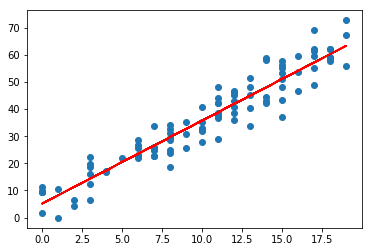

In [3]:
#tiesinis fit duomenims
plt.scatter(x, y)
k, b = np.polyfit(x, y, 1)
k, b
plt.plot(x, k*x+b, color='r')

In [4]:
def bootstrap(x_data, y_data, npoints):
    ind = np.random.randint(0,npoints, npoints)
    k_boot, b_boot = np.polyfit(x_data[ind], y_data[ind], 1) 
    return k_boot, b_boot


In [5]:
N_boot = 100
K_boot = np.zeros(N_boot)
B_boot = np.zeros(N_boot)
Y_boot_corrected = np.zeros(N_boot)
Mean_boot = np.zeros(N_boot)
for i in range(N_boot):
    K_boot[i], B_boot[i] = bootstrap(x, y, npoints)

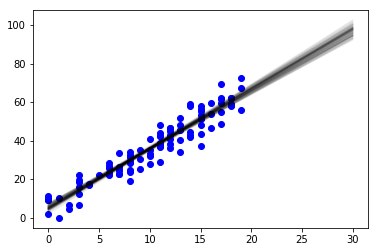

In [6]:
x_new = np.linspace(0,30, 150)
plt.scatter(x, y, color='b')
for i in range(N_boot):
    y_boot = K_boot[i]*x_new + B_boot[i]
    plt.plot(x_new, y_boot, color='k', alpha=0.05)


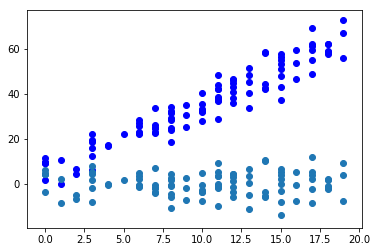

In [7]:
#nusprendžiau atimti k*x + b iš y verčių, patikrinti vidurkį. beto lengviau gausiu std iš bootstrap
plt.scatter(x, y, color='b')
plt.scatter(x, y - x*k - b )

mean = -1.261e-15 std = 5.185e+00


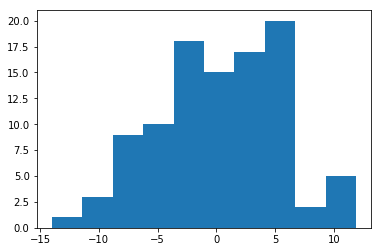

In [8]:
y_corrected = y - x*k - b
plt.hist(y_corrected)
print("mean = {:3.3e}".format(y_corrected.mean()), "std = {:3.3e}".format(y_corrected.std()))


In [9]:

def bootstrap_corrected(y_data_corrected, npoints):
    ind = np.random.randint(0,npoints, npoints)
    mean_boot = y_corrected[ind].mean()
    std_boot = y_corrected[ind].std()
    return mean_boot, std_boot

def bootstrap_x(x_data, npoints):
    ind = np.random.randint(0,npoints, npoints)
    mean_boot = x_data[ind].mean()
    std_boot = x_data[ind].std()
    return mean_boot, std_boot

In [10]:
Mean_boot = np.zeros(N_boot)
Std_boot = np.zeros(N_boot)
for i in range(N_boot):
    Mean_boot[i], Std_boot[i] = bootstrap_corrected(y_corrected, npoints)

Meanx_boot = np.zeros(N_boot)
Stdx_boot = np.zeros(N_boot)

for i in range(N_boot):
    Meanx_boot[i], Stdx_boot[i] = bootstrap_x(x, npoints)
        

Mean:

mean = -2.168e-02 std = 4.791e-01 

Std:

mean = 5.175e+00 std = 3.662e-01


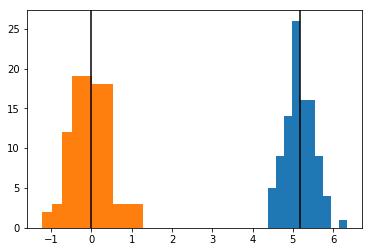

In [11]:
plt.hist(Std_boot);
plt.hist(Mean_boot);
plt.axvline(y_corrected.mean(), color='k')
plt.axvline(y_corrected.std(), color='k')
print("Mean:\n")
print("mean = {:3.3e}".format(Mean_boot.mean()),\
      "std = {:3.3e}".format(Mean_boot.std()),"\n")
print("Std:\n")
print("mean = {:3.3e}".format(Std_boot.mean()),\
      "std = {:3.3e}".format(Std_boot.std()))


Mean:

mean = 1.011e+01 std = 5.034e-01 

Std:

mean = 5.275e+00 std = 2.822e-01


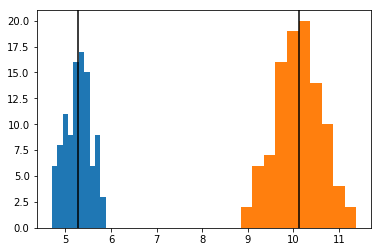

In [12]:
plt.hist(Stdx_boot);
plt.hist(Meanx_boot);
plt.axvline(x.mean(), color='k')
plt.axvline(x.std(), color='k')
print("Mean:\n")
print("mean = {:3.3e}".format(Meanx_boot.mean()),\
      "std = {:3.3e}".format(Meanx_boot.std()),"\n")
print("Std:\n")
print("mean = {:3.3e}".format(Stdx_boot.mean()),\
      "std = {:3.3e}".format(Stdx_boot.std()))


## Rezultatai
Čia grafikas, kur pažymėta predicted y neapibrėžtumai vidurkiui ir paskirai vertei ties x = 30. Žemiau grafikas, kur parodomas tolesnis extrapoliavimas

<ErrorbarContainer object of 3 artists>

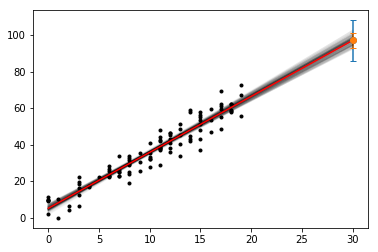

In [13]:
t = 1.984 #mano pasirinktam skaičiuj
y_avg_conf = t*y_corrected.std()\
* np.sqrt(1/ npoints + ((30 - Meanx_boot.mean())**2) / ((npoints - 1)\
                     * Stdx_boot.mean()**2))

y_single_conf = t*y_corrected.std()\
* np.sqrt(1 + 1/ npoints + ((30 - Meanx_boot.mean())**2) / ((npoints - 1)\
                         * Stdx_boot.mean()**2))

plt.scatter(x, y, marker='.',c='k')

for i in range(N_boot):
    y_boot = K_boot[i]*x_new + B_boot[i]
    plt.plot(x_new, y_boot, color='k', alpha=0.05)

plt.plot(np.array([0,30]),k*np.array([0.,30.]) + b, color='r')
    
plt.errorbar(30, k*30 + b, yerr=y_single_conf, marker='o',\
         capsize=3)
plt.errorbar(30, k*30 + b, yerr=y_avg_conf, marker='o',\
             capsize=3)

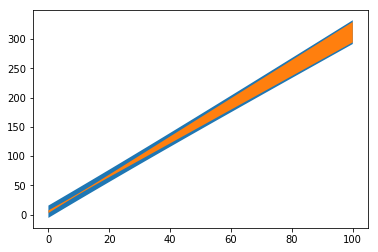

In [14]:
Y_avg_conf = np.zeros(100)
Y_single_conf = np.zeros(100)

for i in range(100):
    Y_avg_conf[i] = t*y_corrected.std()\
    * np.sqrt(1/ npoints + ((i - Meanx_boot.mean())**2)\
              /  ((npoints - 1) * Stdx_boot.mean()**2))

    Y_single_conf[i] = t*y_corrected.std()\
    * np.sqrt(1 + 1/ npoints + ((i - Meanx_boot.mean())**2)\
              / ((npoints - 1) * Stdx_boot.mean()**2))

XX = np.linspace(0,100, 100)
Y1 = np.zeros_like(XX)
Y2 = np.zeros_like(XX)
Y3 = np.zeros_like(XX)
Y4 = np.zeros_like(XX)

for i in range(100):
    Y1[i] = k*XX[i]+ b + Y_single_conf[i]
    Y2[i] = k*XX[i]+ b - Y_single_conf[i]
    
    Y3[i] = k*XX[i]+ b + Y_avg_conf[i]
    Y4[i] = k*XX[i]+ b - Y_avg_conf[i]


plt.fill_between(XX, Y1, Y2)

plt.fill_between(XX, Y3, Y4)

#print(Y_single_conf);